In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate 20 data points
N = 20

# random data on x-axis in (-5, 5)
X = np.random.random(N) * 10 - 5

# y is a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

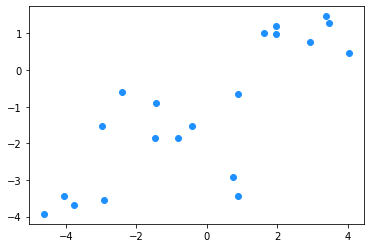

In [4]:
# Plot the data
plt.scatter(X, Y, color='dodgerblue')

In [5]:
# Create a Linear Regression model
model = nn.Linear(1, 1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()    # loss/objective
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [7]:
# In ML we want our data to be of shape:
# num_samples x num_dimensions (N x D)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default ---> need to resolve
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
print(targets.type())

torch.FloatTensor


In [9]:
# Train the model
n_epochs = 30
losses = []

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 14.8654
Epoch 2/30, Loss: 3.2102
Epoch 3/30, Loss: 2.0537
Epoch 4/30, Loss: 1.8330
Epoch 5/30, Loss: 1.7161
Epoch 6/30, Loss: 1.6267
Epoch 7/30, Loss: 1.5546
Epoch 8/30, Loss: 1.4963
Epoch 9/30, Loss: 1.4490
Epoch 10/30, Loss: 1.4106
Epoch 11/30, Loss: 1.3795
Epoch 12/30, Loss: 1.3543
Epoch 13/30, Loss: 1.3339
Epoch 14/30, Loss: 1.3173
Epoch 15/30, Loss: 1.3039
Epoch 16/30, Loss: 1.2930
Epoch 17/30, Loss: 1.2842
Epoch 18/30, Loss: 1.2770
Epoch 19/30, Loss: 1.2712
Epoch 20/30, Loss: 1.2665
Epoch 21/30, Loss: 1.2627
Epoch 22/30, Loss: 1.2596
Epoch 23/30, Loss: 1.2571
Epoch 24/30, Loss: 1.2551
Epoch 25/30, Loss: 1.2534
Epoch 26/30, Loss: 1.2521
Epoch 27/30, Loss: 1.2510
Epoch 28/30, Loss: 1.2501
Epoch 29/30, Loss: 1.2494
Epoch 30/30, Loss: 1.2489


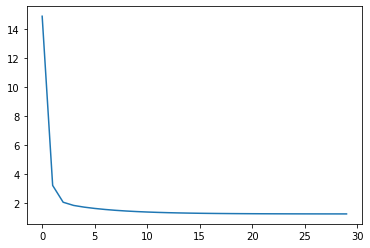

In [10]:
# Plot the loss per iteration
plt.plot(losses)

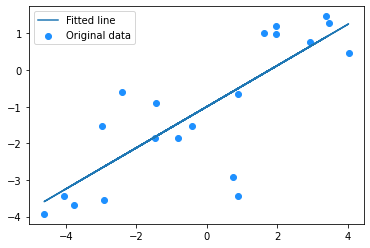

In [11]:
# Plot the fitted line
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, color='dodgerblue', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()

In [12]:
# Error!
model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [13]:
# Another way
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-2.3558364 ],
       [ 1.2603123 ],
       [-2.634892  ],
       [ 0.6501378 ],
       [-0.5063935 ],
       [-1.8147632 ],
       [-0.58696187],
       [ 0.09910107],
       [-2.6771421 ],
       [ 0.8957586 ],
       [-1.8266624 ],
       [-3.2839963 ],
       [-1.4582621 ],
       [-3.5926094 ],
       [-1.2379088 ],
       [ 0.10747004],
       [-0.08026242],
       [ 0.94231534],
       [-3.1243253 ],
       [-0.5030793 ]], dtype=float32)

In [23]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.4191763]] [-0.6536459]
